<a href="https://colab.research.google.com/github/shafin191/Academic_Mental_Health_Project/blob/main/Academic_Mental_Health_DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import pandas as pd
import pickle
import csv
import re
from textblob import TextBlob
import string
import os
import time
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
!git clone https://github.com/shafin191/Academic_Mental_Health_Project.git

Cloning into 'Academic_Mental_Health_Project'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 19 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


In [3]:
df = pd.read_csv("/content/Academic_Mental_Health_Project/Dataset_1.csv")
df = df.drop('Unnamed: 0', axis = 1)
df['date'] = pd.to_datetime(df['Tweet_Time']).dt.date

In [4]:
df.describe()

,Tweet_ID,Total_Hashtags,Retweet_Count,Favorite_Count,User_ID
count,1.634000e+03,1634.000000,1634.000000,1634.000000,1.634000e+03
mean,1.507532e+18,2.691554,27.757038,3.913709,7.734114e+17
std,2.199491e+15,3.595308,50.944229,32.079212,6.063450e+17
min,1.503798e+18,0.000000,0.000000,0.000000,7.981970e+05
25%,1.505759e+18,0.000000,2.000000,0.000000,1.091136e+09
50%,1.507312e+18,1.000000,5.000000,0.000000,1.029599e+18
75%,1.509520e+18,4.000000,19.000000,0.000000,1.295715e+18
max,1.511612e+18,20.000000,311.000000,756.000000,1.509200e+18


In [5]:
stop = stopwords.words('english')
df['tweet_without_stopwords'] = df['Tweet_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df['tweet_without_stopwords'] = df['tweet_without_stopwords'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

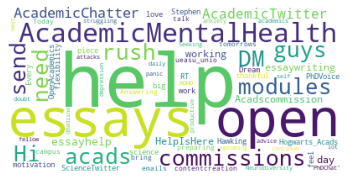

In [6]:

text = df['tweet_without_stopwords'].values 

wordcloud = WordCloud(background_color='white',).generate(str(text))

plt.imshow(wordcloud,)
plt.axis("off")
plt.show()

In [9]:
df_tweet_date = df.groupby('date').count()
df_tweet_date= df_tweet_date.reset_index()
#df_tweet_date = df_tweet_date.drop('index', axis = 1)

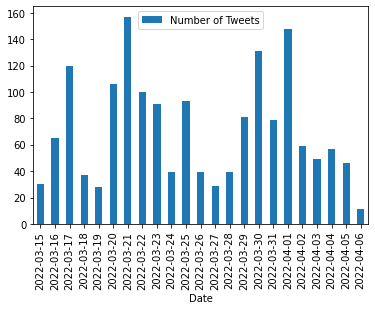

In [10]:
df_tweet_date.plot(x = 'date', y = 'Tweet_ID', 
                   kind = 'bar', label='Number of Tweets',
                   xlabel = 'Date')
plt.show()

In [11]:
df_tweet_date.date

0     2022-03-15
1     2022-03-16
2     2022-03-17
3     2022-03-18
4     2022-03-19
5     2022-03-20
6     2022-03-21
7     2022-03-22
8     2022-03-23
9     2022-03-24
10    2022-03-25
11    2022-03-26
12    2022-03-27
13    2022-03-28
14    2022-03-29
15    2022-03-30
16    2022-03-31
17    2022-04-01
18    2022-04-02
19    2022-04-03
20    2022-04-04
21    2022-04-05
22    2022-04-06
Name: date, dtype: object